# Airline Passenger Satisfaction Analysis & Prediction

## Project Overview
This project performs end-to-end data analysis and machine learning on airline
passenger satisfaction data. The goal is to identify key factors influencing
passenger satisfaction and build predictive models to classify satisfaction
levels.

## Objectives
- Perform exploratory data analysis (EDA) to understand passenger behavior
- Analyze service-related features affecting satisfaction
- Build and evaluate multiple classification models


In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score , confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Kshitij\Desktop\Imarticus\ML\Logistic Reg\Invistico_Airline_with_nulls.csv")

## Initial Data Inspection
We start by examining the structure, size, and basic information of the dataset.

## Dataset Description
- Records: 129,880
- Features: Customer, travel, and service quality metrics
- Target Variable: satisfaction (Satisfied / Neutral or Dissatisfied)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       123387 non-null  object 
 1   Gender                             123588 non-null  object 
 2   Customer Type                      123387 non-null  object 
 3   Age                                123412 non-null  float64
 4   Type of Travel                     123451 non-null  object 
 5   Class                              123448 non-null  object 
 6   Flight Distance                    123427 non-null  float64
 7   Seat comfort                       123399 non-null  float64
 8   Departure/Arrival time convenient  123515 non-null  float64
 9   Food and drink                     123391 non-null  float64
 10  Gate location                      123334 non-null  float64
 11  Inflight wifi service              1233

In [4]:
df.describe() #STATISTICAL SUMMARY

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,123412.000000,123427.000000,123399.000000,123515.000000,123391.000000,123334.000000,123342.000000,123411.000000,123296.000000,123212.000000,123428.000000,123395.000000,123276.000000,123367.000000,123394.000000,123340.000000,123325.000000,123104.000000
mean,39.429642,1981.668087,2.838402,2.991710,2.851934,2.990773,3.249428,3.384358,3.519384,3.472275,3.464822,3.487070,3.696032,3.341355,3.704824,3.352611,14.712126,15.084498
std,15.111823,1026.574837,1.392235,1.527494,1.444819,1.305498,1.319453,1.345562,1.306755,1.305606,1.270825,1.291394,1.155891,1.260357,1.152234,1.298067,38.118841,38.558615
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1360.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [5]:
df.shape

(129880, 23)

In [6]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65.0,Personal Travel,Eco,265.0,0.0,0.0,0.0,...,2.0,3.0,3.0,0.0,3.0,5.0,3.0,2.0,0.0,NaN
1,satisfied,Male,Loyal Customer,47.0,Personal Travel,Business,2464.0,0.0,0.0,0.0,...,2.0,NaN,4.0,4.0,4.0,2.0,3.0,2.0,310.0,305.0
2,satisfied,Female,Loyal Customer,15.0,Personal Travel,NaN,2138.0,0.0,0.0,0.0,...,2.0,2.0,3.0,3.0,4.0,4.0,4.0,2.0,0.0,0.0
3,satisfied,Female,Loyal Customer,60.0,NaN,Eco,623.0,0.0,0.0,0.0,...,NaN,1.0,1.0,NaN,1.0,4.0,1.0,3.0,0.0,0.0
4,satisfied,Female,Loyal Customer,70.0,Personal Travel,Eco,354.0,0.0,0.0,0.0,...,4.0,2.0,2.0,0.0,2.0,4.0,2.0,5.0,0.0,0.0


## Missing Value Analysis
Handling missing values is crucial to ensure reliable analysis.


In [7]:
df.isnull().sum()

satisfaction                         6493
Gender                               6292
Customer Type                        6493
Age                                  6468
Type of Travel                       6429
Class                                6432
Flight Distance                      6453
Seat comfort                         6481
Departure/Arrival time convenient    6365
Food and drink                       6489
Gate location                        6546
Inflight wifi service                6538
Inflight entertainment               6469
Online support                       6584
Ease of Online booking               6668
On-board service                     6452
Leg room service                     6485
Baggage handling                     6604
Checkin service                      6513
Cleanliness                          6486
Online boarding                      6540
Departure Delay in Minutes           6555
Arrival Delay in Minutes             6776
dtype: int64

## 2. Missing Value Analysis
Analyzing the presence and distribution of missing values to assess
data quality before preprocessing.


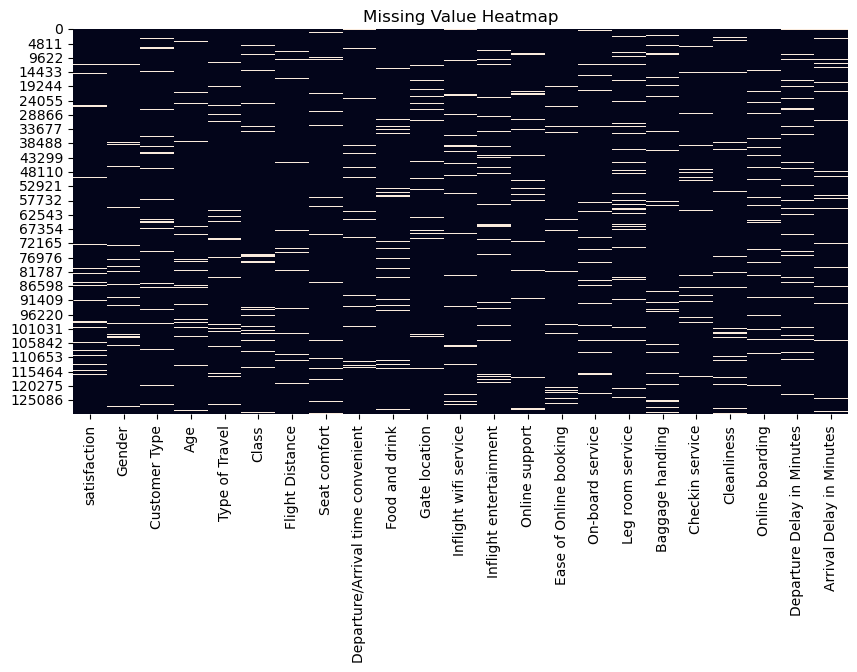

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()

## 3. Univariate Analysis
Examining individual features to understand their distributions
and dominant patterns.
 #### Distribution of Age [histogram]

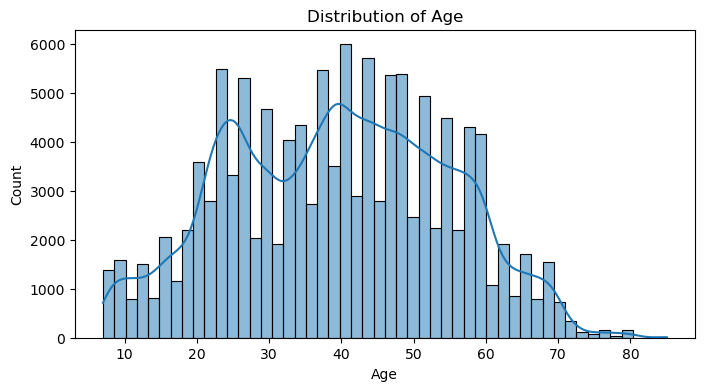

In [9]:
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], bins=50, kde=True)
plt.title("Distribution of Age")
plt.show()

Pie Chart of Gender Distribution

The following pie chart visualizes the distribution of passengers by Gender in the dataset:

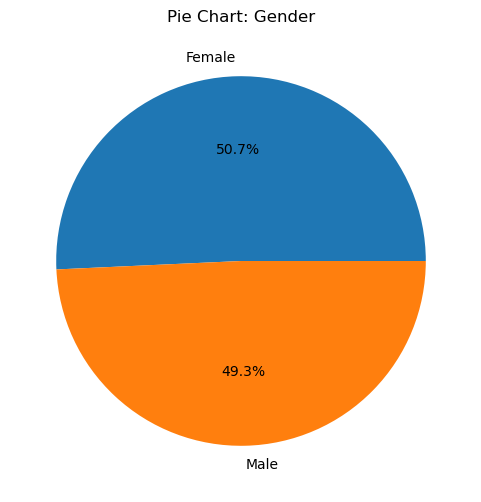

In [10]:
plt.figure(figsize=(6,6))
df["Gender"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Pie Chart: Gender")
plt.ylabel("")
plt.show()


Bar Chart of Type of Travel

The following bar chart shows the distribution of passengers based on their Type of Travel.
It counts the number of occurrences for each travel type and visualizes them in a simple bar plot.

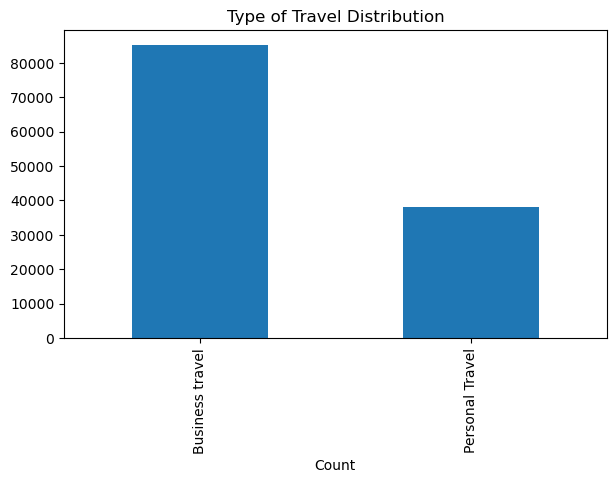

In [11]:
plt.figure(figsize=(7,4))
df["Type of Travel"].value_counts().plot(kind="bar")
plt.title("Type of Travel Distribution")
plt.xlabel("Count")
plt.show()


The violin plot compares the distribution of flight distances across different
types of travel.

Personal travel shows a wider spread with a higher concentration of shorter
flight distances, while business travel tends to be more concentrated around
medium to longer distances.

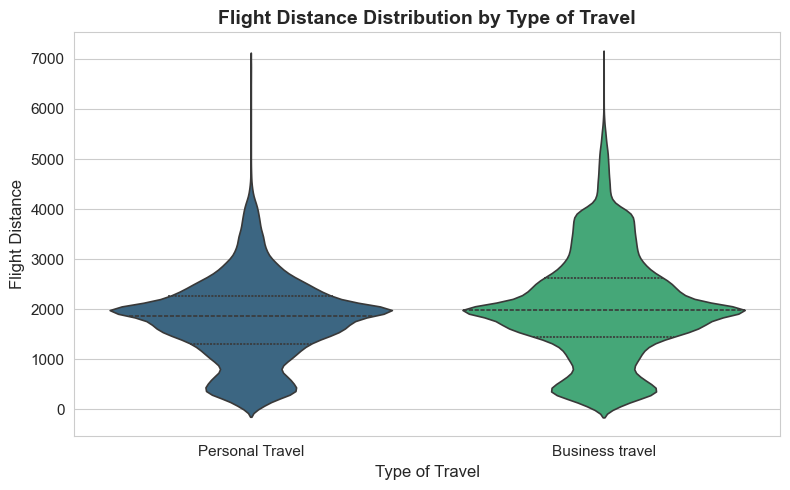

In [30]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")

sns.violinplot( data=df, x="Type of Travel", y="Flight Distance", palette="viridis", inner="quartile",linewidth=1.2)  
plt.title("Flight Distance Distribution by Type of Travel", fontsize=14, weight='bold')
plt.xlabel("Type of Travel", fontsize=12)
plt.ylabel("Flight Distance", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


## Countplot
Loyal customers show a higher proportion of satisfied responses compared
to disloyal customers, indicating that long-term engagement and repeat
usage positively influence customer satisfaction.

This insight suggests that retention strategies and loyalty programs
can play a significant role in improving overall passenger satisfaction.

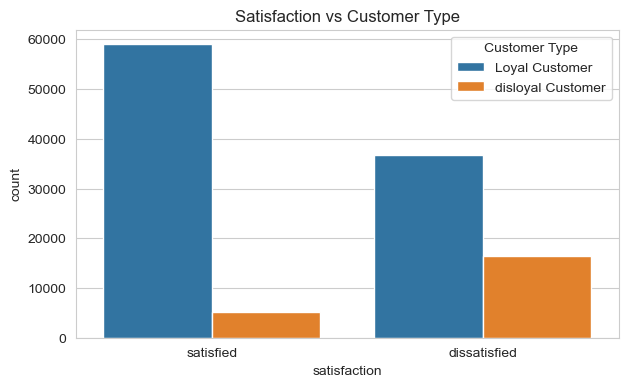

In [13]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='satisfaction', hue='Customer Type')
plt.title("Satisfaction vs Customer Type") #0= Unsatisfied 1= Satisfied
plt.show()

## Correlation HeatMap
A correlation heatmap is used to visualize the strength and direction of relationships between numerical variables in the dataset.

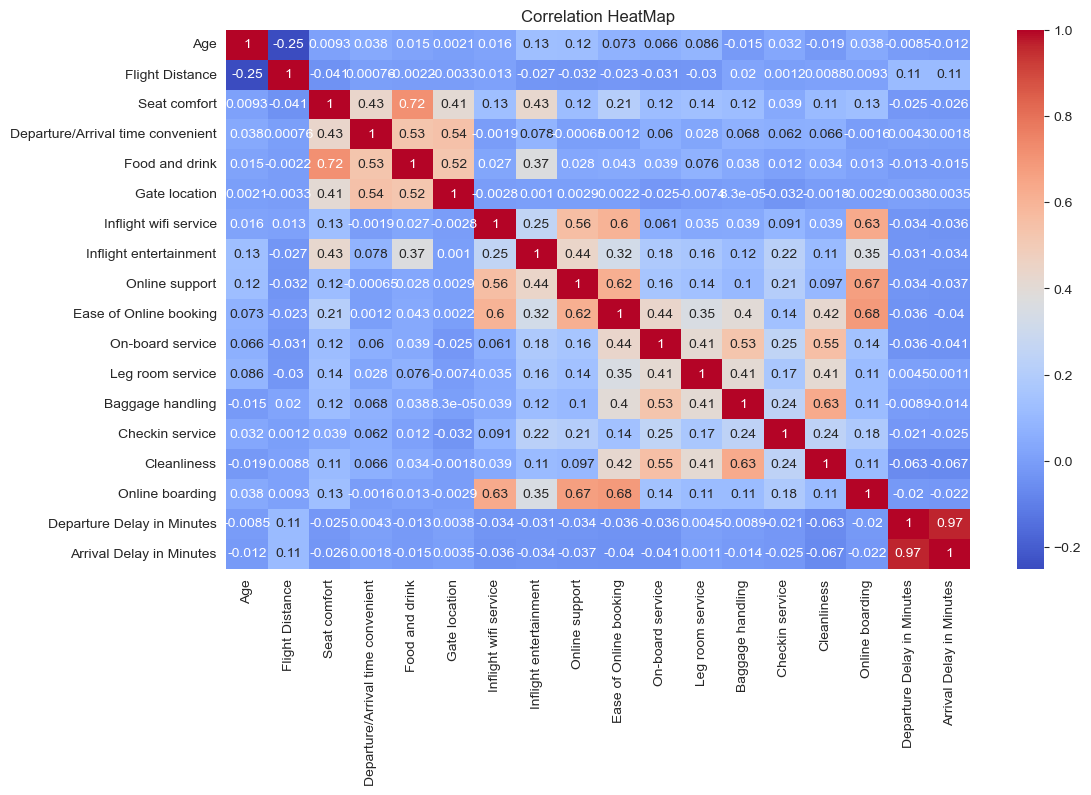

In [14]:
plt.figure(figsize=(12,7))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation HeatMap")
plt.show()

##  Data Preprocessing

### Missing Value Handling Strategy
Missing values were analyzed during EDA and handled during preprocessing.

- Numerical features were imputed using mean values
- Categorical features were imputed using the mode
- This step ensures compatibility with machine learning models


In [15]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

### Feature Engineering
Categorical variables were encoded into numerical format, and
numerical features were scaled where required.


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
label = LabelEncoder()

df['satisfaction'] = label.fit_transform(df['satisfaction'])   # target

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,1,65.0,265.0,0.0,0.0,0.0,2.000000,2.0,4.0,2.000000,...,5.0,3.0,2.0,0.0,15.084498,False,False,True,True,False
1,1,47.0,2464.0,0.0,0.0,0.0,2.990773,0.0,2.0,2.000000,...,2.0,3.0,2.0,310.0,305.000000,True,False,True,False,False
2,1,15.0,2138.0,0.0,0.0,0.0,3.000000,2.0,0.0,2.000000,...,4.0,4.0,2.0,0.0,0.000000,False,False,True,False,False
3,1,60.0,623.0,0.0,0.0,0.0,2.990773,3.0,4.0,3.519384,...,4.0,1.0,3.0,0.0,0.000000,False,False,False,True,False
4,1,70.0,354.0,0.0,0.0,0.0,3.000000,4.0,3.0,4.000000,...,4.0,2.0,5.0,0.0,0.000000,False,False,True,True,False


## Train-test split

To evaluate the performance of a machine learning model, the dataset is divided into training and testing sets.
This ensures that the model is tested on unseen data, helping to measure its generalization ability.

In [18]:
x = df_encoded.drop('satisfaction', axis=1)
y = df_encoded['satisfaction']

In [19]:
x

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,65.0,265.0,0.000000,0.00000,0.0,2.000000,2.0,4.0,2.000000,3.000000,...,5.0,3.0,2.0,0.0,15.084498,False,False,True,True,False
1,47.0,2464.0,0.000000,0.00000,0.0,2.990773,0.0,2.0,2.000000,3.472275,...,2.0,3.0,2.0,310.0,305.000000,True,False,True,False,False
2,15.0,2138.0,0.000000,0.00000,0.0,3.000000,2.0,0.0,2.000000,2.000000,...,4.0,4.0,2.0,0.0,0.000000,False,False,True,False,False
3,60.0,623.0,0.000000,0.00000,0.0,2.990773,3.0,4.0,3.519384,1.000000,...,4.0,1.0,3.0,0.0,0.000000,False,False,False,True,False
4,70.0,354.0,0.000000,0.00000,0.0,3.000000,4.0,3.0,4.000000,2.000000,...,4.0,2.0,5.0,0.0,0.000000,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,29.0,1731.0,2.838402,5.00000,5.0,3.000000,2.0,5.0,2.000000,3.472275,...,4.0,4.0,2.0,0.0,0.000000,False,True,True,True,False
129876,63.0,2087.0,2.000000,2.99171,2.0,4.000000,2.0,1.0,1.000000,3.000000,...,1.0,2.0,1.0,174.0,172.000000,True,True,True,False,False
129877,69.0,2320.0,2.838402,0.00000,3.0,3.000000,3.0,2.0,2.000000,4.000000,...,2.0,3.0,2.0,155.0,163.000000,True,True,True,True,False
129878,66.0,2450.0,3.000000,2.00000,3.0,2.000000,3.0,2.0,2.000000,3.000000,...,2.0,1.0,2.0,193.0,205.000000,True,True,True,True,False


In [20]:
y

0         1
1         1
2         1
3         1
4         1
         ..
129875    1
129876    0
129877    0
129878    0
129879    0
Name: satisfaction, Length: 129880, dtype: int64

In [21]:
x_train , x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=48)

In [22]:
x_train 

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
75965,32.0,4050.000000,2.000000,1.0,1.000000,1.0,2.000000,2.0,2.0,2.0,...,4.0,3.0,2.0,102.000000,85.000000,True,False,False,False,False
105631,48.0,2127.000000,3.000000,3.0,3.000000,3.0,4.000000,4.0,4.0,4.0,...,3.0,4.0,4.0,8.000000,15.084498,True,False,False,False,False
62869,29.0,1785.000000,5.000000,5.0,5.000000,2.0,4.000000,5.0,4.0,4.0,...,5.0,5.0,4.0,0.000000,0.000000,False,True,False,True,False
86596,41.0,55.000000,2.838402,4.0,4.000000,4.0,3.000000,4.0,4.0,3.0,...,1.0,3.0,1.0,3.000000,2.000000,True,False,False,False,False
105884,37.0,1643.000000,4.000000,5.0,2.851934,5.0,4.000000,4.0,4.0,4.0,...,4.0,1.0,4.0,8.000000,6.000000,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43355,36.0,3376.000000,1.000000,1.0,1.000000,5.0,2.000000,1.0,2.0,2.0,...,4.0,5.0,2.0,6.000000,0.000000,True,True,False,False,False
95684,46.0,1676.000000,5.000000,5.0,5.000000,5.0,4.000000,4.0,5.0,4.0,...,3.0,4.0,5.0,0.000000,0.000000,False,False,False,False,False
9553,64.0,2142.000000,2.000000,2.0,2.000000,2.0,2.000000,2.0,2.0,2.0,...,3.0,2.0,2.0,0.000000,0.000000,True,False,True,True,False
2611,42.0,1981.668087,5.000000,4.0,0.000000,4.0,1.000000,1.0,2.0,1.0,...,5.0,1.0,1.0,14.712126,10.000000,False,False,True,False,True


## 6. Modeling & Evaluation

Multiple classification models are trained and evaluated to predict
airline passenger satisfaction.


In [23]:
lor = LogisticRegression()
lor.fit(x_train , y_train)
y_pred = lor.predict(x_test)

In [24]:
acc = accuracy_score(y_test, y_pred)
acc*100

76.17416076378196

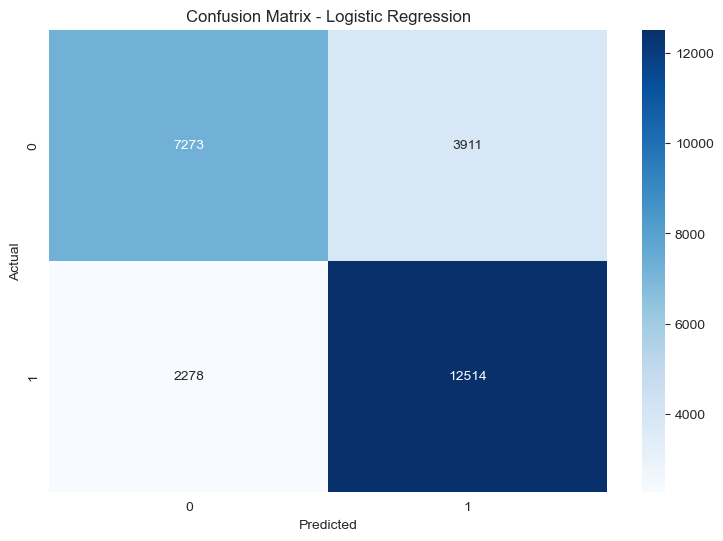

In [36]:
confu_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,6))
sns.heatmap(confu_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Model Evaluation
Model performance was evaluated using accuracy scores and confusion matrices
to compare predictive effectiveness.


In [38]:
precision = precision_score(y_test , y_pred)
precision*100

76.18873668188738

In [26]:
classi = classification_report(y_test , y_pred)
print(classi)

              precision    recall  f1-score   support

           0       0.76      0.65      0.70     11184
           1       0.76      0.85      0.80     14792

    accuracy                           0.76     25976
   macro avg       0.76      0.75      0.75     25976
weighted avg       0.76      0.76      0.76     25976



### Interpretation

The classification report shows that the model performs well in
distinguishing satisfied and dissatisfied passengers.

In [27]:
y_pred_prob = lor.predict_proba(x_test)[:, 1]
print(y_pred_prob)

[0.65730594 0.60562043 0.35757428 ... 0.27231838 0.87114361 0.33715261]


### ROC Curve & AUC Analysis

The ROC curve evaluates the model’s ability to distinguish between classes
across different probability thresholds.

- AUC (Area Under Curve) ranges from 0 to 1
- Higher AUC indicates better class separation


In [28]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
roc_auc

np.float64(0.8409073209061697)

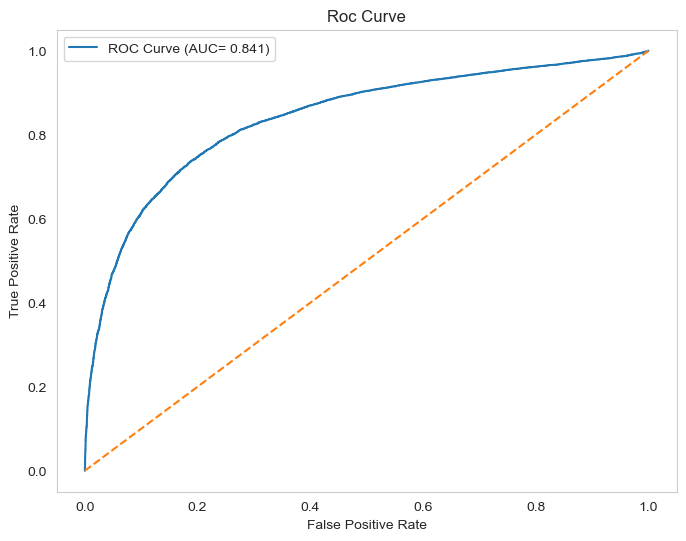

In [29]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr,label=f"ROC Curve (AUC= {roc_auc:.3f})")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Roc Curve")
plt.legend()
plt.grid()
plt.show()

## Key Insights & Business Implications
- Online boarding and inflight service are major satisfaction drivers
- Business class passengers tend to report higher satisfaction
- Predictive models can help airlines proactively improve service quality


## Conclusion
This project combined exploratory data analysis and machine learning to
identify key factors influencing airline passenger satisfaction.

The insights and models developed can assist airlines in improving
customer experience and retention.
